In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
s_df = pd.read_csv("data/sc.csv")
s_df.head()

,Unnamed: 0,student_id,gender,leader_flag,support_flag,score,assigned_class
0,0,1,0,0,0,335,F
1,1,2,1,0,0,379,A
2,2,3,0,0,0,350,C
3,3,4,0,0,0,301,B
4,4,5,1,0,0,317,E


# 数理最適化のみでのクラス編成

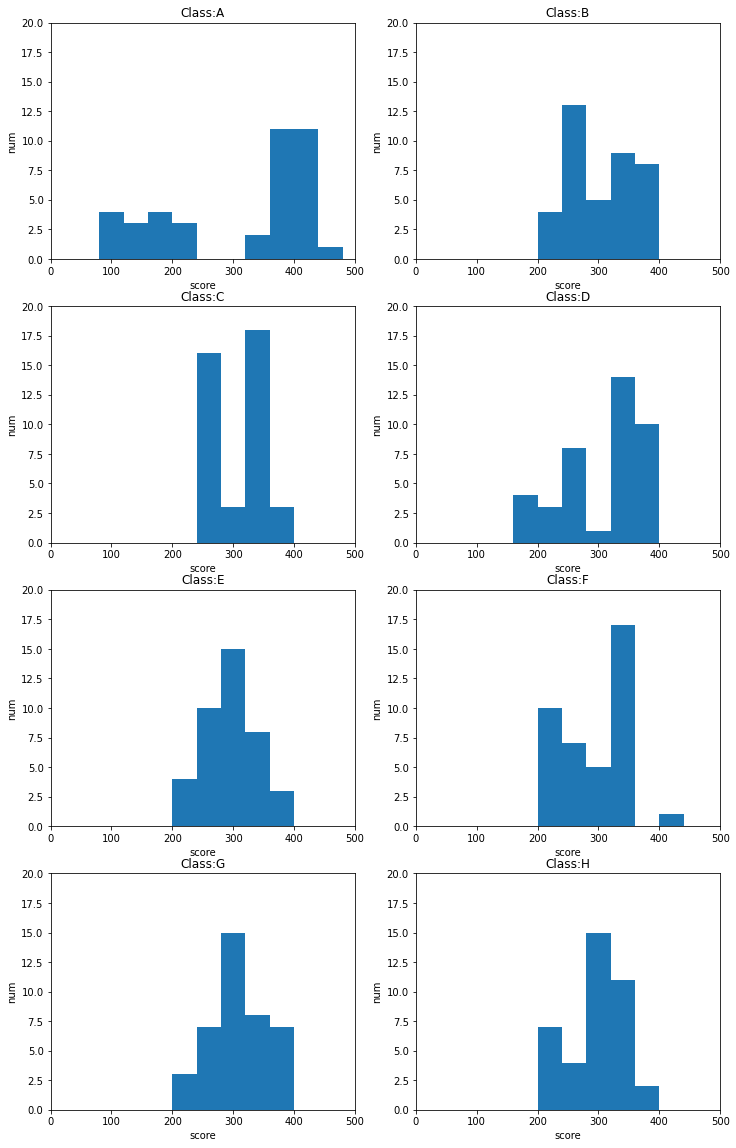

In [8]:
fig = plt.figure(figsize=(12, 20))
C = sorted(list(set(s_df["assigned_class"].tolist())))
for i, c in enumerate(C):
    cls_df = s_df[s_df["assigned_class"]==c]
    ax = fig.add_subplot(4, 2, i+1, xlabel="score", ylabel="num", xlim=(0, 500), ylim=(0, 20), title="Class:{:s}".format(c))
    ax.hist(cls_df["score"], bins=range(0,500,40))

# 学力順でのクラス編成

In [11]:
S = s_df["student_id"].tolist()
# クラスリスト（ハードコーディングxxx）
C = ["A", "B", "C", "D", "E", "F", "G", "H"]
class_dic = {0:"A", 1:"B", 2:"C", 3:"D", 4:"E", 5:"F", 6:"G", 7:"H"}
# 学力順位を付与 & 初期クラス編成
s_df["score_rank"] = s_df["score"].rank(ascending=False, method="first")
s_df["init_assigned_class"] = s_df["score_rank"].map(lambda x:x % 8).map(class_dic)
init_flag = {(s,c):0 for s in S for c in C}
for row in s_df.itertuples():
    init_flag[row.student_id, row.init_assigned_class] = 1
s_df.head()

,Unnamed: 0,student_id,gender,leader_flag,support_flag,score,assigned_class,score_rank,init_assigned_class
0,0,1,0,0,0,335,F,109.0,F
1,1,2,1,0,0,379,A,38.0,G
2,2,3,0,0,0,350,C,79.0,H
3,3,4,0,0,0,301,B,172.0,E
4,4,5,1,0,0,317,E,147.0,D


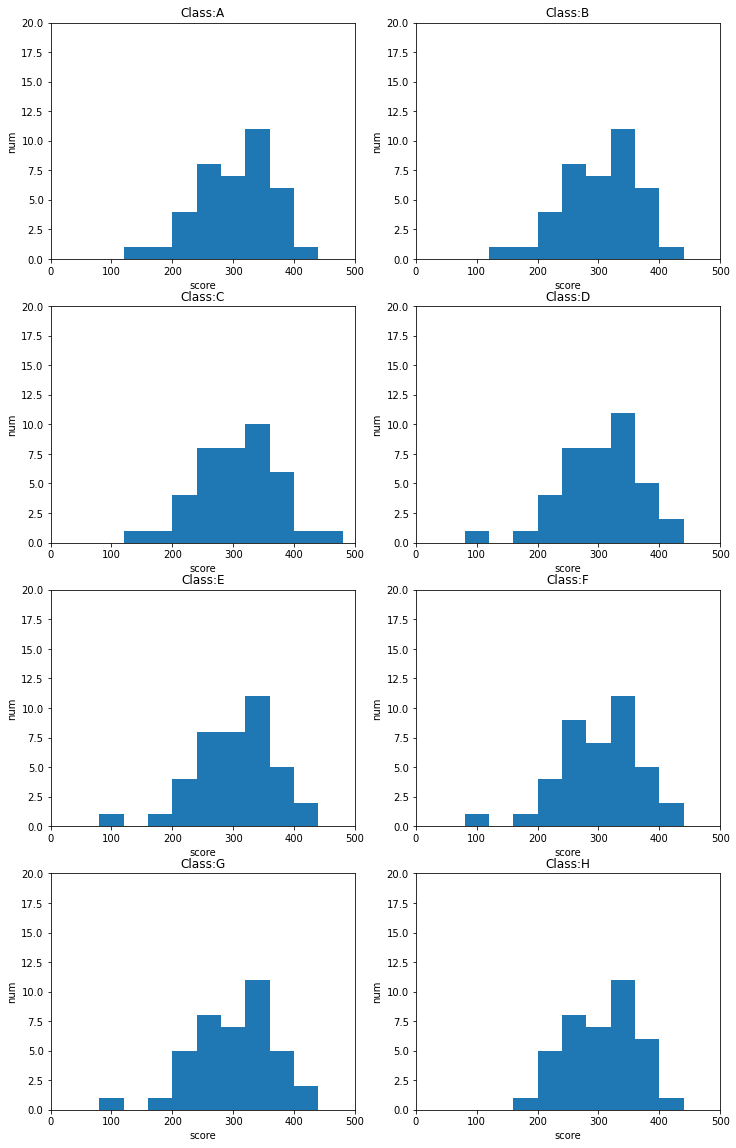

In [12]:
fig = plt.figure(figsize=(12, 20))
C = sorted(list(set(s_df["init_assigned_class"].tolist())))
for i, c in enumerate(C):
    cls_df = s_df[s_df["init_assigned_class"]==c]
    ax = fig.add_subplot(4, 2, i+1, xlabel="score", ylabel="num", xlim=(0, 500), ylim=(0, 20), title="Class:{:s}".format(c))
    ax.hist(cls_df["score"], bins=range(0,500,40))

# 学力順+数理最適化を組み合わせたクラス編成

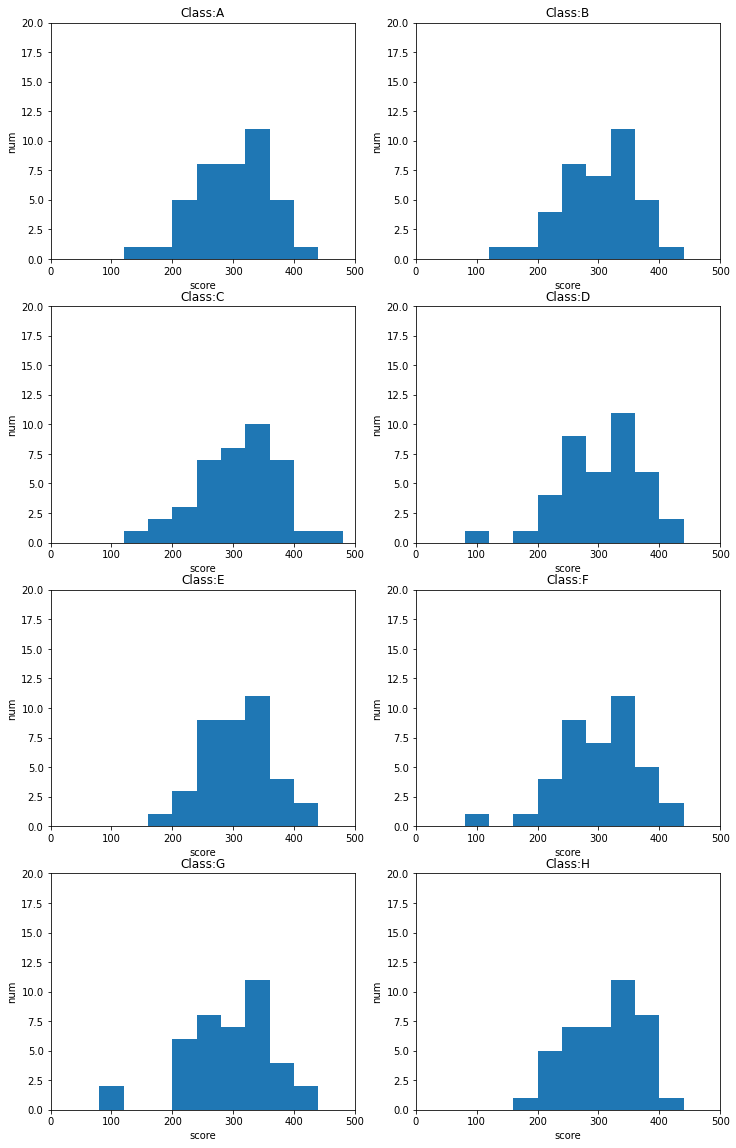

In [13]:
s_df = pd.read_csv("data/sc2.csv")
fig = plt.figure(figsize=(12, 20))
C = sorted(list(set(s_df["assigned_class"].tolist())))
for i, c in enumerate(C):
    cls_df = s_df[s_df["assigned_class"]==c]
    ax = fig.add_subplot(4, 2, i+1, xlabel="score", ylabel="num", xlim=(0, 500), ylim=(0, 20), title="Class:{:s}".format(c))
    ax.hist(cls_df["score"], bins=range(0,500,40))